## Data Set  

use Diabetic Dataset

## Data Information

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Attribute information

Pregnancies - Number of times pregnant

Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure - Diastolic blood pressure (mm Hg)

SkinThickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI - Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction - Diabetes pedigree function

Age - Age (years)

Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
%matplotlib inline

In [2]:
names= ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

data= pd.read_csv("pima-indians-diabetes.data",names=names)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum() #no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#zero values for Glucose,BloodPressure,SkinThickness,Insulin,BMI

In [10]:
#mean imputation for the zeros

data['Glucose'].replace(0,data['Glucose'].mean(),inplace=True)
data['BloodPressure'].replace(0,data['BloodPressure'].mean(),inplace=True)
data['SkinThickness'].replace(0,data['SkinThickness'].mean(),inplace=True)
data['Insulin'].replace(0,data['Insulin'].mean(),inplace=True)
data['BMI'].replace(0,data['BMI'].mean(),inplace=True)

In [11]:
data.skew() #some level of skewness present

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

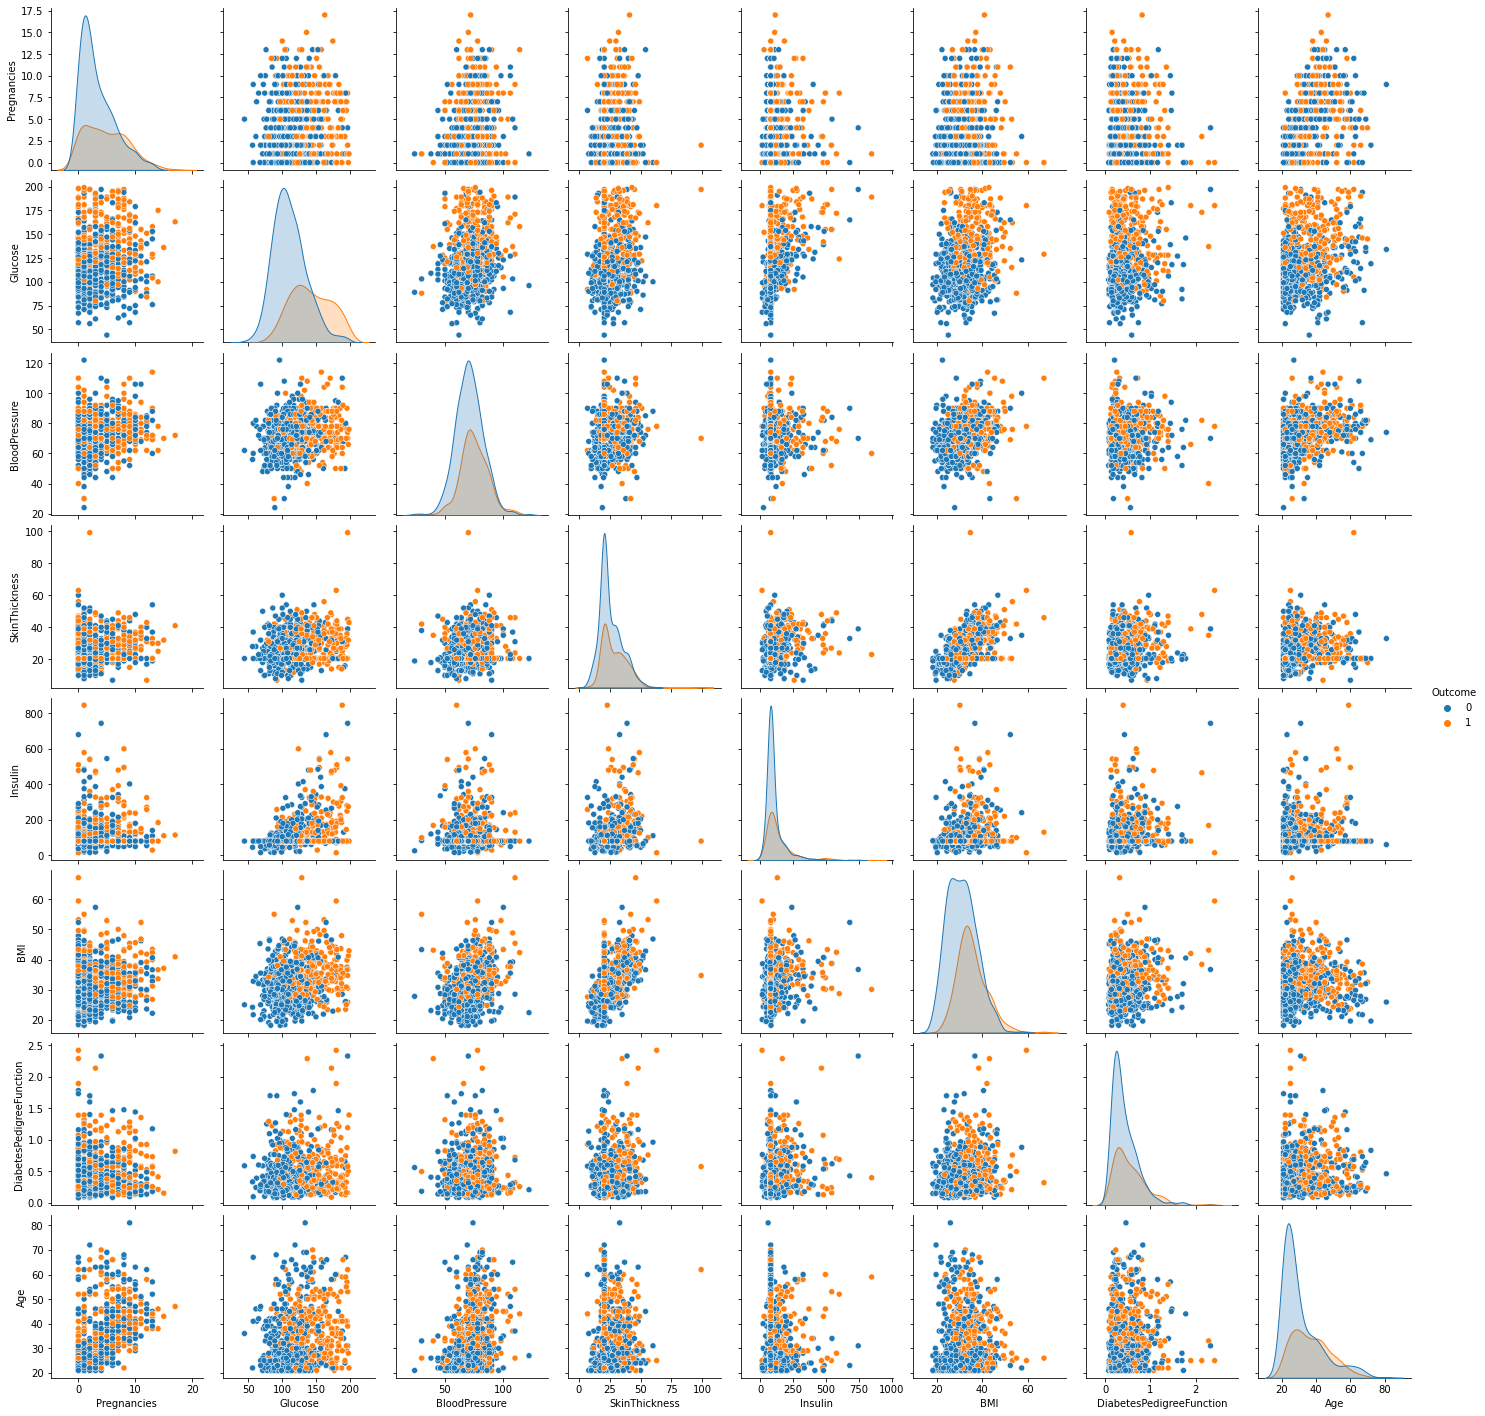

In [12]:
sns.pairplot(data,hue='Outcome')

<AxesSubplot:>

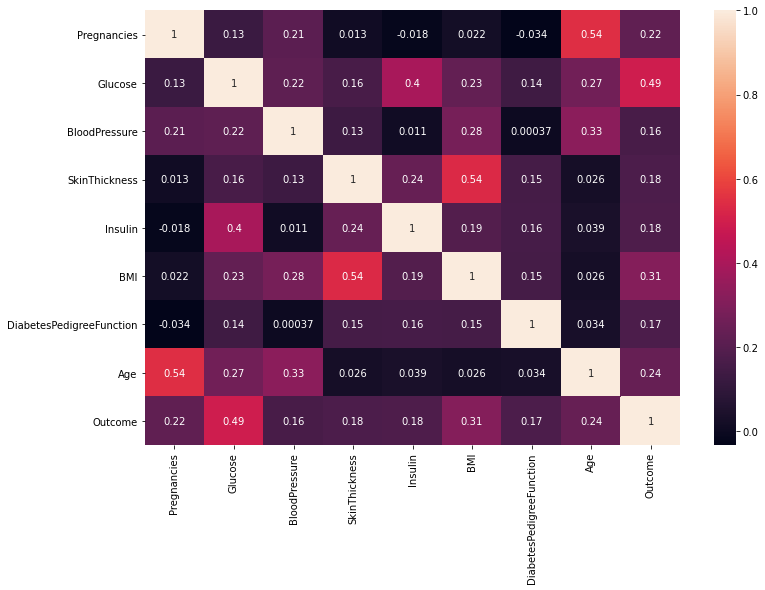

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [16]:
x=data.drop('Outcome',axis=1)
y=data.Outcome

In [17]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
ss=StandardScaler()
x_scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

## Manual PCA

In [18]:
#1.covarience matrix

covarience_mat=np.cov(x_scaled,rowvar=False)
covarience_mat

array([[ 1.00130378e+00,  1.28130654e-01,  2.09256130e-01,
         1.33937293e-02, -1.81058406e-02,  2.15740159e-02,
        -3.35663792e-02,  5.45050930e-01],
       [ 1.28130654e-01,  1.00130378e+00,  2.19952093e-01,
         1.60975382e-01,  3.97113746e-01,  2.31779298e-01,
         1.37285117e-01,  2.66947481e-01],
       [ 2.09256130e-01,  2.19952093e-01,  1.00130378e+00,
         1.34330038e-01,  1.09404306e-02,  2.81597872e-01,
         3.71613077e-04,  3.27166239e-01],
       [ 1.33937293e-02,  1.60975382e-01,  1.34330038e-01,
         1.00130378e+00,  2.40674267e-01,  5.36401906e-01,
         1.55163280e-01,  2.64573647e-02],
       [-1.81058406e-02,  3.97113746e-01,  1.09404306e-02,
         2.40674267e-01,  1.00130378e+00,  1.90103238e-01,
         1.58011548e-01,  3.87025622e-02],
       [ 2.15740159e-02,  2.31779298e-01,  2.81597872e-01,
         5.36401906e-01,  1.90103238e-01,  1.00130378e+00,
         1.53708138e-01,  2.57816826e-02],
       [-3.35663792e-02,  1.372851

In [21]:
#2.Eig value,Eig vector

eig_val,eig_vec=np.linalg.eig(covarience_mat)
print('Eig Value')
eig_val

Eig Value


array([2.21136191, 1.62480074, 0.39329432, 0.45803831, 0.54189381,
       0.78061344, 0.90339065, 1.09703706])

In [20]:
print('Eig Vector')
eig_vec

Eig Vector


array([[ 0.26863223,  0.54531225,  0.39568649, -0.48479403,  0.04241215,
        -0.45852362, -0.16381036, -0.00130036],
       [ 0.43544938, -0.0169104 ,  0.23903933,  0.02795566, -0.6440751 ,
         0.24884706,  0.29261777, -0.43565331],
       [ 0.36649338,  0.23512384,  0.23795449,  0.02209233,  0.40394701,
         0.66664824,  0.12883232,  0.3593023 ],
       [ 0.38983915, -0.35604728,  0.36650415,  0.53080757,  0.01084669,
        -0.42434464, -0.04376585,  0.35081665],
       [ 0.32442186, -0.28268744, -0.11886344, -0.1194327 ,  0.61196501,
        -0.17488641,  0.30952878, -0.53436981],
       [ 0.42996021, -0.31106472, -0.4925835 , -0.4966759 , -0.20715243,
        -0.04232998,  0.01108622,  0.42920931],
       [ 0.19874437, -0.24107374,  0.06159241, -0.04233571,  0.05099027,
         0.24375039, -0.86937868, -0.28100647],
       [ 0.34973412,  0.53432734, -0.57860532,  0.46819338, -0.00802064,
        -0.10747857, -0.131444  , -0.09642447]])

In [22]:
eig_pair=[(eig_val[i],eig_vec[:,i])for i in range (len(eig_val))]
eig_pair.sort(reverse=True)
eig_pair

[(2.2113619121177717,
  array([0.26863223, 0.43544938, 0.36649338, 0.38983915, 0.32442186,
         0.42996021, 0.19874437, 0.34973412])),
 (1.624800740391763,
  array([ 0.54531225, -0.0169104 ,  0.23512384, -0.35604728, -0.28268744,
         -0.31106472, -0.24107374,  0.53432734])),
 (1.0970370565667384,
  array([-0.00130036, -0.43565331,  0.3593023 ,  0.35081665, -0.53436981,
          0.42920931, -0.28100647, -0.09642447])),
 (0.9033906500581399,
  array([-0.16381036,  0.29261777,  0.12883232, -0.04376585,  0.30952878,
          0.01108622, -0.86937868, -0.131444  ])),
 (0.7806134439476796,
  array([-0.45852362,  0.24884706,  0.66664824, -0.42434464, -0.17488641,
         -0.04232998,  0.24375039, -0.10747857])),
 (0.5418938094201101,
  array([ 0.04241215, -0.6440751 ,  0.40394701,  0.01084669,  0.61196501,
         -0.20715243,  0.05099027, -0.00802064])),
 (0.4580383144135743,
  array([-0.48479403,  0.02795566,  0.02209233,  0.53080757, -0.1194327 ,
         -0.4966759 , -0.042335

In [23]:
#3.Percentage of variation
eig_val=list(eig_val)
eig_val.sort(reverse=True)

percentage=[]
for p in eig_val :
    var=(p/sum(eig_val))*100
    percentage.append(var)
percentage

[27.60603168285044,
 20.283563930346393,
 13.695107786241675,
 11.277679501865128,
 9.744962752406744,
 6.764852731530347,
 5.718023879479355,
 4.90977773527991]

In [24]:
np.cumsum(percentage)

array([ 27.60603168,  47.88959561,  61.5847034 ,  72.8623829 ,
        82.60734565,  89.37219839,  95.09022226, 100.        ])

In [25]:
#4.transformation
x_red=np.array(eig_vec.T)
x_red=np.dot(x_scaled,x_red)

In [26]:
x_red

array([[ 0.03965375,  0.10992553,  0.96770626, ...,  0.27993763,
        -0.90816907,  0.89291266],
       [-0.77678778, -0.4306268 , -1.56260163, ...,  0.17952327,
         0.22256276, -0.36330809],
       [ 1.96085455,  0.48311275, -0.26663068, ...,  0.65677535,
        -1.09777934,  1.68515545],
       ...,
       [ 0.7799472 , -0.12641332, -0.71561687, ...,  0.27829653,
         0.53591451,  0.15972993],
       [-0.04585884, -1.06456313, -0.55504003, ...,  1.00375325,
        -0.34883762,  0.04674313],
       [-0.83827371,  0.05206539, -1.30744909, ..., -0.48500728,
         0.59131883, -0.29614503]])

In [32]:
df_pca=pd.DataFrame(x_red,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,0.039654,0.109926,0.967706,0.800833,-1.040548,0.279938,-0.908169,0.892913
1,-0.776788,-0.430627,-1.562602,0.348590,-0.019324,0.179523,0.222563,-0.363308
2,1.960855,0.483113,-0.266631,-0.324266,0.207520,0.656775,-1.097779,1.685155
3,-0.404355,-0.286197,-1.715563,-0.394293,0.355873,0.036002,1.000466,-0.454500
4,-3.095575,0.539830,1.032078,-2.037075,1.461914,0.107984,-4.907212,0.929587


## SKlearn PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca_val=PCA()

In [29]:
pca_val.fit(x_scaled)

PCA()

In [30]:
print('The PCA explained variance or EIG VAL :')
pca_val.explained_variance_  

The PCA explained variance or EIG VAL :


array([2.21136191, 1.62480074, 1.09703706, 0.90339065, 0.78061344,
       0.54189381, 0.45803831, 0.39329432])

In [33]:
print('The explained variance ratio :')
np.cumsum(pca_val.explained_variance_ratio_)*100

The explained variance ratio :


array([ 27.60603168,  47.88959561,  61.5847034 ,  72.8623829 ,
        82.60734565,  89.37219839,  95.09022226, 100.        ])

In [34]:
print("PCA Components :")
pca_val.components_


PCA Components :


array([[ 0.26863223,  0.43544938,  0.36649338,  0.38983915,  0.32442186,
         0.42996021,  0.19874437,  0.34973412],
       [-0.54531225,  0.0169104 , -0.23512384,  0.35604728,  0.28268744,
         0.31106472,  0.24107374, -0.53432734],
       [ 0.00130036,  0.43565331, -0.3593023 , -0.35081665,  0.53436981,
        -0.42920931,  0.28100647,  0.09642447],
       [ 0.16381036, -0.29261777, -0.12883232,  0.04376585, -0.30952878,
        -0.01108622,  0.86937868,  0.131444  ],
       [-0.45852362,  0.24884706,  0.66664824, -0.42434464, -0.17488641,
        -0.04232998,  0.24375039, -0.10747857],
       [ 0.04241215, -0.6440751 ,  0.40394701,  0.01084669,  0.61196501,
        -0.20715243,  0.05099027, -0.00802064],
       [-0.48479403,  0.02795566,  0.02209233,  0.53080757, -0.1194327 ,
        -0.4966759 , -0.04233571,  0.46819338],
       [-0.39568649, -0.23903933, -0.23795449, -0.36650415,  0.11886344,
         0.4925835 , -0.06159241,  0.57860532]])

In [35]:
eig=pd.DataFrame(pca_val.components_.T,index=x.columns)
eig.columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8']
eig

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
Pregnancies,0.268632,-0.545312,0.001300,0.163810,-0.458524,0.042412,-0.484794,-0.395686
Glucose,0.435449,0.016910,0.435653,-0.292618,0.248847,-0.644075,0.027956,-0.239039
BloodPressure,0.366493,-0.235124,-0.359302,-0.128832,0.666648,0.403947,0.022092,-0.237954
SkinThickness,0.389839,0.356047,-0.350817,0.043766,-0.424345,0.010847,0.530808,-0.366504
Insulin,0.324422,0.282687,0.534370,-0.309529,-0.174886,0.611965,-0.119433,0.118863
BMI,0.429960,0.311065,-0.429209,-0.011086,-0.042330,-0.207152,-0.496676,0.492584
DiabetesPedigreeFunction,0.198744,0.241074,0.281006,0.869379,0.243750,0.050990,-0.042336,-0.061592
Age,0.349734,-0.534327,0.096424,0.131444,-0.107479,-0.008021,0.468193,0.578605


In [36]:
#number of components=7

pca=PCA(n_components=7)
df_pca=pd.DataFrame(pca.fit_transform(x_scaled),columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,1.409153,-0.733975,0.053541,0.614705,-0.435278,-0.807059,0.791007
1,-1.485388,0.281229,-0.406849,0.088242,-0.321995,0.438592,0.895484
2,0.088633,-1.033262,1.854121,0.328091,0.037134,-1.476451,-0.255280
3,-1.935771,0.493247,-0.381190,-0.622154,-0.104683,0.373818,0.066754
4,1.197622,3.533308,2.026670,4.631353,-0.316275,-1.156047,-0.103267


## Clustering

### ORIGINAL

Text(0.5, 1.0, 'The Elbow Plot')

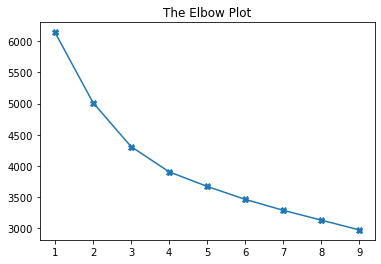

In [41]:
from sklearn.cluster import KMeans


err=[]
r=range(1,10)

for e in r :
    kmeans=KMeans(n_clusters=e)
    kmeans.fit(x_scaled)
    err.append(kmeans.inertia_)
plt.plot(r,err,marker='X')
plt.title('The Elbow Plot')

#### Finding the silhouette score 

In [48]:
from sklearn.metrics import silhouette_score

s=[2,3,4,5,6,7,8]

for c in s :
    modl=KMeans(n_clusters=c)
    modl.fit_predict(x_scaled)
    score=silhouette_score(x_scaled,modl.labels_)
    print(f'Silhouette Score for {c} cluster is :{round(score,4)}')

Silhouette Score for 2 cluster is :0.2008
Silhouette Score for 3 cluster is :0.2005
Silhouette Score for 4 cluster is :0.1889
Silhouette Score for 5 cluster is :0.1824
Silhouette Score for 6 cluster is :0.1722
Silhouette Score for 7 cluster is :0.1464
Silhouette Score for 8 cluster is :0.1565


Optimal k value is 2 for the original data .

In [51]:
kmeans=KMeans(n_clusters=2)
label_1=kmeans.fit_predict(x_scaled)
df_k=x_scaled.copy()
df_k['Label_1']=label_1
df_k.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label_1
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995,1
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672,0
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584,1
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549,0
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496,0


## PCA

Now we will check same for the PCA data.

Text(0.5, 1.0, 'The Elbow Plot')

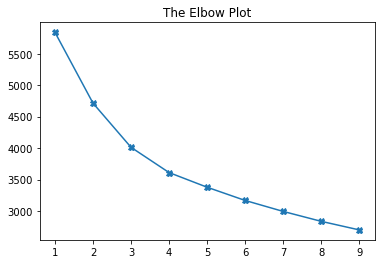

In [49]:
err=[]
r=range(1,10)

for e in r :
    kmeans=KMeans(n_clusters=e)
    kmeans.fit(df_pca)
    err.append(kmeans.inertia_)
plt.plot(r,err,marker='X')
plt.title('The Elbow Plot')

Elbow plot is quite similar for the pca also

now checking the silhouette_score for the pca data

In [50]:
s=[2,3,4,5,6,7,8]

for c in s :
    modl=KMeans(n_clusters=c)
    modl.fit_predict(df_pca)
    score=silhouette_score(df_pca,modl.labels_)
    print(f'Silhouette Score for {c} cluster is :{round(score,4)}')

Silhouette Score for 2 cluster is :0.2097
Silhouette Score for 3 cluster is :0.2108
Silhouette Score for 4 cluster is :0.2019
Silhouette Score for 5 cluster is :0.1941
Silhouette Score for 6 cluster is :0.1579
Silhouette Score for 7 cluster is :0.1549
Silhouette Score for 8 cluster is :0.1571


Here we can see that the Silhouette Score is changed for pca data.
optimal clusters become 3 in the pca data,previously the optimal clusters was 2 for the original data.

In [52]:
kmeans=KMeans(n_clusters=3)
label_2=kmeans.fit_predict(df_pca)
df_p=df_pca.copy()
df_p['Label_2']=label_2
df_p.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Label_2
0,1.409153,-0.733975,0.053541,0.614705,-0.435278,-0.807059,0.791007,2
1,-1.485388,0.281229,-0.406849,0.088242,-0.321995,0.438592,0.895484,0
2,0.088633,-1.033262,1.854121,0.328091,0.037134,-1.476451,-0.255280,2
3,-1.935771,0.493247,-0.381190,-0.622154,-0.104683,0.373818,0.066754,0
4,1.197622,3.533308,2.026670,4.631353,-0.316275,-1.156047,-0.103267,1


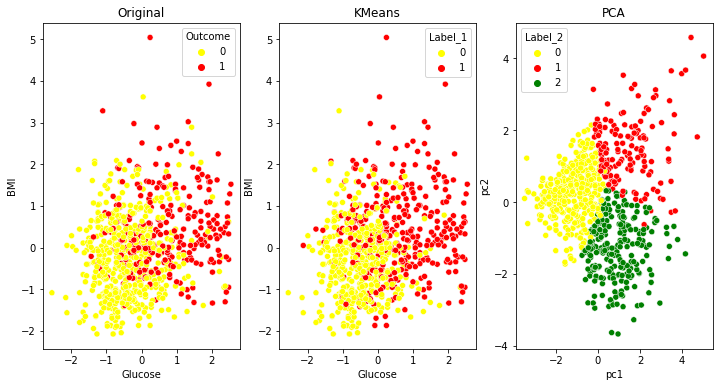

In [63]:
plt.rcParams['figure.figsize'] = (12,6)

plt.subplot(1,3,1)
plt.title('Original')
sns.scatterplot(x=x_scaled['Glucose'],y=x_scaled['BMI'],hue=y,data=x_scaled,palette=['yellow','red'])

plt.subplot(1,3,2)
plt.title('KMeans')
sns.scatterplot(x=df_k['Glucose'],y=df_k['BMI'],hue=df_k['Label_1'],data=df_k,palette=['yellow','red'])

plt.subplot(1,3,3)
plt.title('PCA')
sns.scatterplot(x=df_p['pc1'],y=df_p['pc2'],hue=df_p['Label_2'],data=df_p,palette=['yellow','red','green'])
plt.show()

for the original graph and the kmeans graph the datapoints are same because we used the scaled data for the modeling but as we can see that there are lots of overlaping in the data
but for the PCA graph we can clearly see that the data points are almost seperated as our cluster goal.we can easily infer that the pca graph is good as the clusters are clear and not overlaped.


## DecisionTree

Checking the accuracy score for the PCA data

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

x=df_p.drop('Label_2',axis=1)
y=df_p.Label_2

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

dc=DecisionTreeClassifier()
dc=dc.fit(xtrain,ytrain)
y_test_pred=dc.predict(xtest)
print('The Cassification Report for the PCA result:')
print(classification_report(ytest,y_test_pred))

The Cassification Report for the PCA result:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.97      0.94      0.95        32
           2       0.98      0.95      0.96        56

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



Checking the accuracy score for the original data

In [70]:
x=df_k.drop('Label_1',axis=1)
y=df_k.Label_1

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

dc=DecisionTreeClassifier()
dc=dc.fit(xtrain,ytrain)
y_test_pred=dc.predict(xtest)
print('The Cassification Report for the KMeans :')
print(classification_report(ytest,y_test_pred))

The Cassification Report for the KMeans :
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        87
           1       0.89      0.85      0.87        67

    accuracy                           0.89       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.89      0.89      0.89       154



In [69]:
x=x_scaled
y=data.Outcome

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

dc=DecisionTreeClassifier()
dc=dc.fit(xtrain,ytrain)
y_test_pred=dc.predict(xtest)
print('The Cassification Report for Original data :')
print(classification_report(ytest,y_test_pred))

The Cassification Report for Original data :
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        95
           1       0.66      0.56      0.61        59

    accuracy                           0.72       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



According to the above reports we can see that the accuracy is way better for the PCA data rather than original data.In our original data the accuracy is 72% but in the PCA the accuracy increases almost 96%.